<a href="https://colab.research.google.com/github/federicocampo/CNN_prova/blob/Prime_modifiche/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the dataset from Google Drive

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Reading the images

In [19]:
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
import os
import glob
import numpy as np

import logging
import time


logger = logging.getLogger('Mylogger')
logger.setLevel(logging.INFO)



In [20]:
PATH = 'gdrive/MyDrive/IMAGES/Mammography_micro'

## Old "reading images" function

*  Imread restituisce un array 60 x 60

In [ ]:
def read_imgs(dataset_path, classes):
  logger.debug('In folder: %s', dataset_path)
  tmp = []
  labels = []
  for cls in classes:
    fnames = glob.glob(os.path.join(dataset_path, str(cls), '*.pgm'))
    tmp += [ imread(fname) for fname in fnames ]
    labels += len(fnames)*[cls]
  images_array = np.array(tmp, dtype='float32')[..., np.newaxis]/255
  labels_array = np.array(labels)

  print('Found %d images' %len(images_array))
  
  return images_array, labels_array

Ci sta ~5 minuti a caricare le immagini

In [ ]:
initial_time = time.time()
path_to_png_data = os.path.join(PATH, 'Train')
x_train, y_train = read_imgs(path_to_png_data, [0, 1])

test_dataset_path =os.path.join(PATH, 'Test')
x_test, y_test = read_imgs(test_dataset_path, [0, 1])

logger.info('x_train shape = ', x_train.shape)


elapsed_time=time.time() - initial_time
logger.info('Done in %.1f minutes',elapsed_time/60)

Found 396 images
Found 401 images


In [ ]:
len(x_train)


396

## Parallel "Reading images" function

In [21]:
import multiprocessing as mp

def parallel_read_img(image_path):
  fnames = glob.glob(os.path.join(image_path, '*.pgm'))

  pool = mp.Pool(processes=4)
  results = pool.map_async(imread, fnames)

  x = results.get()
  x_np = np.array(x, dtype='float32')[..., np.newaxis]/255

  print('Num images found = ', x_np.shape)
  return x_np


In [22]:
start_time = time.time()

labels = []

image_path = os.path.join(PATH, 'Train/0')
x0_train = parallel_read_img(image_path)
labels += len(x0_train)*[0]

image_path = os.path.join(PATH, 'Train/1')
x1_train = parallel_read_img(image_path)
labels += len(x1_train)*[1]

x_train = np.concatenate((x0_train, x1_train), axis = 0)
y_train = np.array(labels)

print('x_train shape = ', x_train.shape)


labels = []

image_path = os.path.join(PATH, 'Test/0')
x0_test = parallel_read_img(image_path)
labels += len(x0_test)*[0]

image_path = os.path.join(PATH, 'Test/1')
x1_test = parallel_read_img(image_path)
labels += len(x1_test)*[1]

x_test = np.concatenate((x0_test, x1_test), axis = 0)
y_test = np.array(labels)

print('x_test shape = ', x_test.shape)

elapsed_time = time.time() - start_time
logging.info('Elapsed time = %.2f s', elapsed_time)
print('Elapsed time = ', elapsed_time, 's')

Num images found =  (209, 60, 60, 1)
Num images found =  (187, 60, 60, 1)
x_train shape =  (396, 60, 60, 1)
Num images found =  (205, 60, 60, 1)
Num images found =  (196, 60, 60, 1)
x_test shape =  (401, 60, 60, 1)
Elapsed time =  1.231438398361206 s


(60, 60)
Printing x_train images
(60, 60)


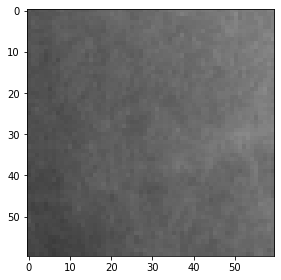

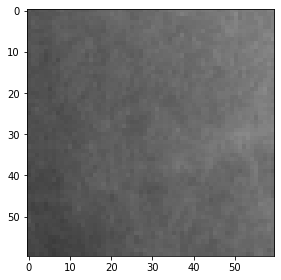

In [23]:
'''
Visualize some images from images' folder 
'''

image_type = 'Test/0'
a = 25
b = a+1

i =1
for imagename in (os.listdir(os.path.join(PATH, image_type)))[a:b]:
  Im = imread(os.path.join(PATH, image_type, imagename))
  print(Im.shape)
  plt.figure(i)
  imshow(Im)
  i+=1

print('Printing x_train images')

'''
Visualize some images from x_train
'''

for n in range(a, b):
  Im = x_test[n].squeeze()
  print(Im.shape)
  plt.figure(i)
  imshow(Im)
  i+=1

# Defining a CNN model

In [24]:
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Flatten, InputLayer, Activation, Dropout
from keras.models import Sequential

##CNN model
Per ora è la miglire tra le 3 (con 100 epoche) per loss e validation sul dataset augmented

In [8]:
def make_model(shape=(60, 60, 1)):
  model = Sequential([
      
      Conv2D(50, (5,5), padding='same', input_shape=shape),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D((2,2)),
      
      Conv2D(60, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D((2,2)),
        
      Conv2D(100, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      Conv2D(100, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      Conv2D(50, (4,4), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D(2, 2),

      Flatten(), 
      

      Dense(1, activation='sigmoid')
      
  ])
  
  return model


In [25]:
#Prova 1
def make_model(shape=(60, 60, 1)):
  model = Sequential([
      
      Conv2D(50, (5,5), padding='same', input_shape=shape),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D((2,2)),
      
      Conv2D(100, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D((2,2)),
        
      Conv2D(200, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      Conv2D(200, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      Conv2D(100, (3,3), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPool2D(2, 2),

      Flatten(), 
      

      Dense(1, activation='sigmoid')
      
  ])
  
  return model

## MODEL = MAKE_MODEL() AND COMPILE

In [10]:
from keras.optimizers import SGD

model = make_model()

model.compile(optimizer=SGD(lr = 0.001, momentum = 0.9), metrics = 'accuracy', loss='binary_crossentropy')


#Fit model on Dataset

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

reduce_lr = ReduceLROnPlateau(
    monitor='loss', 
    factor=0.5,
    patience = 5,
    min_lr=0.00001

)

checkpoint = ModelCheckpoint(
    "model-{epoch:02d}-{val_accuracy:.2f}.hdf5", 
    monitor='val_accuracy', 
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto', save_freq='epoch')


Epoch 1/100
10/10 [==============================] - 4s 75ms/step - loss: 0.6726 - accuracy: 0.7216 - val_loss: 0.7104 - val_accuracy: 0.1176
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 0.4618 - accuracy: 0.8176 - val_loss: 0.7472 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 25ms/step - loss: 0.4421 - accuracy: 0.7826 - val_loss: 0.8366 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.3280 - accuracy: 0.8526 - val_loss: 0.9192 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.2765 - accuracy: 0.8790 - val_loss: 1.0685 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2428 - accuracy: 0.8860 - val_loss: 1.1745 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 0.1697 - accuracy: 0.9451 - val_loss: 1.2993 - val_acc

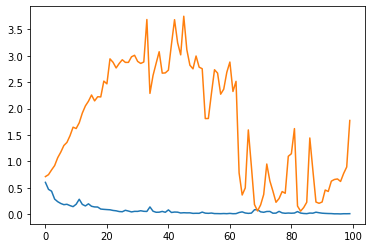

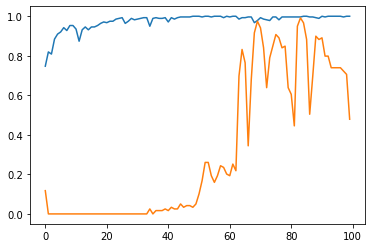

In [ ]:
history = model.fit(x_train, y_train, 
                    validation_split=0.3, 
                    epochs=100, 
                    batch_size=30, 
                    shuffle=True, 
                    callbacks = [checkpoint],
                    verbose=1)



#print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
model.save(os.path.join(PATH, 'model.hdf5'))
model.evaluate(x_test, y_test)  # returns 'loss' and 'metrics' (accuracy)

13/13 [==============================] - 0s 7ms/step - loss: 0.9798 - accuracy: 0.6983


[0.9797717332839966, 0.6982543468475342]

# Data augmentation
 Before we can run data aumentation with ImageDataGenerator we need to convert the PGM format to PNG

In [ ]:
basename = os.path.basename(PATH)
print(basename)

Mammography_micro


In [ ]:
import PIL
import os

In [ ]:
def convert_to_png(fname, dest_folder):
  if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)
  dest_fname = os.path.basename(fname).replace('.pgm', '.png')
  dest_fname = os.path.join(dest_folder, dest_fname)
  PIL.Image.open(fname).convert('L').save(dest_fname)


Provare a fare una funzione migliore per convertire tutti i pgm in png
Questa ci sta ~5 minuti

In [ ]:
start_time = time.time()
for data_path in [os.path.join(PATH, "Train"), os.path.join(PATH, "Test")]:
  for path, folders, fnames in os.walk(data_path):
    for fname in fnames:
      abs_path = os.path.join(path, fname)
      dest_folder = path.replace('Train', 'Train_png').replace('Test', 'Test_png')
      convert_to_png(abs_path, dest_folder)
print('Elapsed time = %.2f s', time.time()-start_time)

291.19284987449646


# Data aumentation

In [26]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Il FLOW_FROM_DIRECTORY prende in input il path della directory di arrivo e genera gruppi di immagini dando in output un ITERATORE (x, y) con y le labels e x le immagini con shape (batch_size, *target_size, channels)

di default crea le imm in png

*  batch_size (di default è 32) cioè il numero di immagini modificate generate per ogni immagine di X_train.

*  subset = training o validation, funziona solo se c'è validation_split nel 




ImageDataGenerator


IMAGEDATAGENERATOR:
Validation_split = 0.3 divide tutte le N immagini di x_train in: 70% train e 30% validazione e usa questo dataset nel model.fit 



In [27]:
path_to_png_data = os.path.join(PATH, "Train_png")

img_width, img_height = (60, 60)

aug_validation_split = 0.3


train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,  #Rescale every pixel to have a value between 0 and 1
        shear_range=0.2, #Stretches the image 
        zoom_range=0.2, 
        horizontal_flip=True,
        fill_mode='reflect',
        validation_split = aug_validation_split)  
        



train_gen = train_datagen.flow_from_directory(
    path_to_png_data,
    target_size=(img_width, img_height),
    color_mode='grayscale', 
    class_mode='binary',
    subset='training')

val_gen = train_datagen.flow_from_directory(
    path_to_png_data,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    class_mode='binary',
    subset='validation')



Found 278 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


Il.next() accede ad una immagine. train_gen.next()[0] ha shape = (32, 60, 60, 1) cioè per ogni immagine del dataset, lui genera 32 immagini modificate di dimensione 60x60 di colori grayscale

# Fit model on augmented images

In [28]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

checkpoint = ModelCheckpoint(
    "model_augmented.{epoch:02d}-{val_accuracy:.2f}.h5", 
    monitor='val_accuracy', 
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto', save_freq='epoch')

STEPS_PER_EPOCH: Definisce il numero di immagini da usare ad ogni epoca, è utile quando il numero delle immagini non è fisso perchè vengono generate potenzialmente infiniti samples

In [29]:
Tot_train_imgs = len(x_train)
Tot_train_imgs

396

INFO:Mylogger:Steps per epoch = 277
INFO:Mylogger:Val steps = 118


Epoch 1/100
8/8 [==============================] - 2s 125ms/step - loss: 0.6387 - accuracy: 0.6069 - val_loss: 0.6919 - val_accuracy: 0.7083

Epoch 00001: val_accuracy did not improve from 0.97917
Epoch 2/100
8/8 [==============================] - 1s 87ms/step - loss: 0.5060 - accuracy: 0.7568 - val_loss: 0.6926 - val_accuracy: 0.5729

Epoch 00002: val_accuracy did not improve from 0.97917
Epoch 3/100
8/8 [==============================] - 1s 94ms/step - loss: 0.4864 - accuracy: 0.7914 - val_loss: 0.6944 - val_accuracy: 0.3333

Epoch 00003: val_accuracy did not improve from 0.97917
Epoch 4/100
8/8 [==============================] - 1s 91ms/step - loss: 0.5330 - accuracy: 0.7045 - val_loss: 0.6946 - val_accuracy: 0.5417

Epoch 00004: val_accuracy did not improve from 0.97917
Epoch 5/100
8/8 [==============================] - 1s 87ms/step - loss: 0.4891 - accuracy: 0.7420 - val_loss: 0.6951 - val_accuracy: 0.5521

Epoch 00005: val_accuracy did not improve from 0.97917
Epoch 6/100
8/8 [==

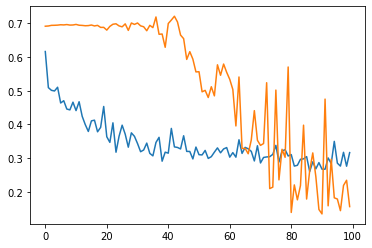

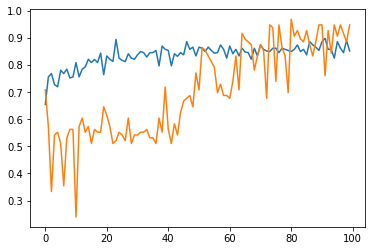

In [36]:
model = make_model()


model.compile(optimizer=SGD(lr=0.0005, momentum=0.5), loss='binary_crossentropy', metrics=['accuracy'])


batch_size=32
steps_per_epoch = int(Tot_train_imgs * (1- aug_validation_split))
validation_steps = int(Tot_train_imgs * aug_validation_split)

logger.info('Steps per epoch = %d', steps_per_epoch)
logger.info('Val steps = %d', validation_steps)


history = model.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch // batch_size,
        epochs=100,
        validation_data=val_gen,
        validation_steps= validation_steps // batch_size,
        verbose=1,
        callbacks=[checkpoint])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

Saving the model

In [37]:
model.save(os.path.join(PATH, 'model_augmented.hdf5'))

model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 7ms/step - loss: 0.4619 - accuracy: 0.7955


[0.46187886595726013, 0.7955112457275391]

# Comparing the performances of the two models

In [ ]:
from keras.models import load_model
aug_model = load_model(os.path.join(PATH, 'model_augmented.hdf5'))
noaug_model = load_model(os.path.join(PATH, 'model.hdf5'))

In [ ]:
noaug_model.evaluate(x_test, y_test)

aug_model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 15ms/step - loss: 0.6845 - accuracy: 0.5686


[0.684547483921051, 0.5685785412788391]

#Implement a cross-validation test

In [17]:
from sklearn.model_selection import KFold

In [ ]:
# Define per-fold score arrays
acc_per_fold = []
loss_per_fold = []

# Merge train and test in a single array
X_tot = np.concatenate((x_train, x_test), axis=0)
Y_tot = np.concatenate((y_train, y_test), axis=0)


num_folds = 10

kfold = KFold(n_splits=num_folds, shuffle=True)

batch_size = 32
num_epochs = 30

fold_nro = 1

for train, test in kfold.split(X_tot, Y_tot):
  print('In fold n. ', fold_nro)
  model = make_model()

  model.compile(optimizer=SGD(lr = 0.001, momentum = 0.9), metrics = 'accuracy', loss='binary_crossentropy')

  history = model.fit(
          X_tot[train], Y_tot[train],
          batch_size = batch_size,
          verbose=0,
          epochs = num_epochs)  
  
  scores = model.evaluate(X_tot[test], Y_tot[test], verbose=0)

  print(f'Score for fold {fold_nro}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])
  fold_nro += 1

Computing average scores

In [19]:
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')

print('\n')
print('Average scores for all folds:')
print(f'-- Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'-- Loss: {np.mean(loss_per_fold)}')



Score per fold
> Fold 1 - Loss: 0.27033376693725586 - Accuracy: 0.8999999761581421%
> Fold 2 - Loss: 0.23841264843940735 - Accuracy: 0.8999999761581421%
> Fold 3 - Loss: 0.7847806215286255 - Accuracy: 0.762499988079071%
> Fold 4 - Loss: 0.15519122779369354 - Accuracy: 0.9375%
> Fold 5 - Loss: 0.18688325583934784 - Accuracy: 0.8999999761581421%
> Fold 6 - Loss: 0.2376764565706253 - Accuracy: 0.9125000238418579%
> Fold 7 - Loss: 0.3531305193901062 - Accuracy: 0.875%
> Fold 8 - Loss: 0.31873416900634766 - Accuracy: 0.9113923907279968%
> Fold 9 - Loss: 0.32309162616729736 - Accuracy: 0.8607594966888428%
> Fold 10 - Loss: 0.24024492502212524 - Accuracy: 0.8987341523170471%


Average scores for all folds:
-- Accuracy: 0.8858385980129242 (+- 0.04556260182307142)
-- Loss: 0.31084792166948316
